**General tips for computing and plotting discrete fourier transforms (DFT)**

- Let g(t) be some time signal that’s sampled at $dt$ to get a discrete array/list `g = [ … ]`
- You don’t need to code your own DFT, use numpy:  `A = numpy.fft.fft(g) * dt`
- You should also use `numpy.fft.fftshift( A )` to shift the fft output such that the 0-frequency component is centered (see why here https://docs.scipy.org/doc/numpy/reference/routines.fft.html#background-information) which you probably want when plotting
- You can use `f_axis = numpy.fft.fftshift( numpy.fft.fftfreq(len(g), dt) )` to create the frequency axis for plotting the shifted spectrum
- Keep in mind the fft output is in general complex, so to compare two fourier transforms (e.g. DFT vs CFT) you should compare either the real and imaginary parts ($z = x + i y$), or the phase and amplitude ($z = r e^{i\theta}$ ). Amplitude plots are most useful for this lab, show all 4 aspects though if you want.
- Note numpy fft assumes the time signal starts at $t = 0$, if yours doesn’t you should center it at zero. If you don’t then the complex components (x and y, or phase) will be off, but the amplitude should not change (why? analytically, recall that axis shifts in either domain are equivalent to complex exponential scaling, which has amplitude 1, in the other domain).
- If your time signal g is centered at zero, a hack to ‘rotate it’ to start at zero (and then take the fft and fftshift that) is to do: `fftshift( fft( ifftshift(g) ) )` (you may see mention of this online)

# Fourier transform of Gaussian Functions (6 pts)

A common function used for the convolution of time series data is the Gaussian function

$$  g(t) = \frac{1}{\sqrt{\pi} t_H} e^{-(t/t_H)^2}, $$

where $t_H$ is the half duration.

 1. Plot $g(t)$ for $t_H = 15$ and $t_H = 45$ sec on the same graph with domain $[-100, 100]$ and $dt=10^{-3}$.
 2. The analytical formula for the Fourier transform of $g(t)$ is

    $$ G(\omega) = e^\frac{-\omega^2 t_H^2}{4}. $$

    Compute the discrete Fourier transform (DFT) for both sampled $g(t)$
    time series, and compare them to the analytical $G(\omega)$
    for both $t_H$'s on the same graph.

    __Hints__: 
    - As numpy fft assumes signal starts from time 0, you can
    use the shift property of Fourier transform to first shift the $g(t)$
    to start from zero, and after `fftshift(fft())` operations, multiply
    the spectrum by complex exponential sinusoid function.
    - You need to sample the theoretical curve $G(w)$ with `w_axis = 2*pi*f_axis`, or else rewrite it as $G(f=\frac{w}{2\pi})$ if you'd rather sample it with `f_axis`
    - As a guide (so you can be confident of your fft utilization for the remainder of the lab), we expect that the amplitudes (use `numpy.abs(…)`) of the discrete FT and the continuous FT essentially match. The phase won’t necessarily match.
 3. Comment on the effect of filtering a general input time function $f(t)$ by $g(t)$
    (i.e. convolution of $f(t)$ with $g(t)$), and explain the difference in filtered output
    after applying Gaussian functions with $t_H = 15$ or $45$ secs.
 4. Comment on how this is related to the time-frequency uncertainty principle (a signal cannot
    be infinitesimally sharp both in time and frequency).

### Collaborators: None

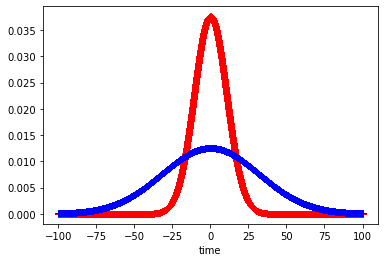

In [176]:
import numpy as np
import matplotlib.pyplot as plt

#parameters
dt=0.001
n=int(200/dt)
j=1/(n*dt)
t=np.fft.fftshift(np.fft.fftfreq(n,j))

h1=15
h2=45

#define the gaussian
g1=np.exp(-(t/h1)**2)/(np.sqrt(np.pi)*h1)
g2=np.exp(-(t/h2)**2)/(np.sqrt(np.pi)*h2)

#plot the gaussian
plt.plot(t,g1,"r+",t,g2,"b+")
plt.xlabel("time")
plt.show()


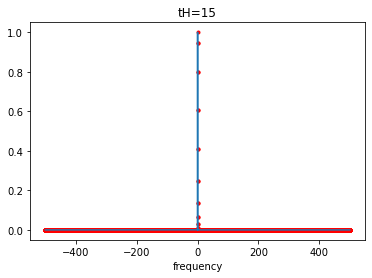

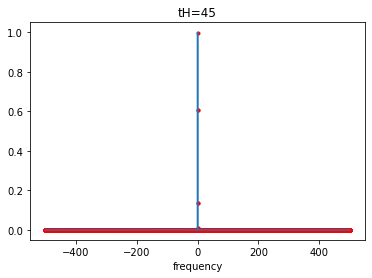

In [177]:
#define the frequece axis
fax=np.fft.fftshift(np.fft.fftfreq(len(g1), dt))
omega=2*np.pi*fax

#DFT the gaussians
gft1=np.abs(np.fft.fftshift(np.fft.fft(np.fft.ifftshift(g1))))*dt
G1=np.exp(-(omega**2)*(h1**2)/4)

gft2=np.abs(np.fft.fftshift(np.fft.fft(np.fft.ifftshift(g2))))*dt
G2=np.exp(-(omega**2)*(h2**2)/4)

#plot the analytic FT and the DFT of the gaussian
plt.plot(fax,gft1,"r.",fax,G1)
plt.xlabel("frequency")
plt.title("tH=15")
plt.show()

plt.plot(fax,gft2,"r.",fax,G2)
plt.xlabel("frequency")
plt.title("tH=45")
plt.show()


3.

The fourier transform of the gaussian is that of the delta function of amplitude 1, then filtering some general function f(t) by g(t) would mean that the fourier transform of filtered function(which is the convolution between the fourier transform of f and g) would just be the fourier transform of f. Since the delta function convolve with any function h(t) would just be h(t) itself.

Furthermore we see that the fourier transform when tH=15, has more discrete points than tH=45. Since the analytic fourier transform tells us that G($\omega$) is the delta function, this means when tH=45 the function reaches the peak faster, then tH=45 has a smaller peak width than tH=15. Which means that the convolution of tH=45 with a general function f(t) would be closer to the convolution of the delta function with f(t), making the resulting fourier transform more accurate than when tH=15.

4.

Since we see that the fourier transform of gaussian is delta function, this means the fourier transform of the delta function is the gaussain. Since any function infinitely sharp in time/frequency is filtered by the delta function, this means its fourier transform in the frequency/time would be convolved by the fourier transform of the delta function. As we see above, that the fourier transform of delta is the gaussian, and the gaussian convolve with any function cannot result in an infinitely sharp pulse. This means a function cannot be infinitely sharp in both time and frequency.

# Fourier transform of Window Functions (6 pts)

A continuous time signal $f(t)$ can be truncated into a signal of finite length
$T$ by window functions $b(t)$:

$$ g(t) = f(t) b(t) $$

Typical window functions include:

 * Boxcar function
    $$b(t) =
    \begin{cases}
    1 & 0 \leq t \leq T
    \\
    0 & \text{else}
    \end{cases}
    $$
 * Hann window
    $$b(t) =
    \begin{cases}
    \frac{1}{2} \left( 1 - \cos \frac{2 \pi t}{T} \right) & 0 \leq t \leq T
    \\
    0 & \text{else}
    \end{cases}
    $$

Now let $T = 10$ seconds, and sample both window functions by $\Delta t = 0.01$ seconds:

 1. Plot both window functions on the same graph.
 2. Calculate the Fourier transform of both functions by numpy `fft()`. Pay extra attention to
    how you interpret the corresponding frequencies of output results from python.
    (_Hint_: `fftshift()` may be useful. Also pay attention to the length of the input signal
    (> 10 sec), as it dictates the frequency resolution for the spectrum.)
 3. Plot the Fourier transform of both functions in the appropriate frequency range on the
    same graph.
 4. Based on the FTs, comment on the effect of truncating a continuous time series by either
    window on its frequency spectrum $G(\omega)$ compared to the original spectrum $F(\omega)$.
 5. Speculate on the advantages and disadvantages of boxcar and Hann window functions for truncation.

### Collaborators: None

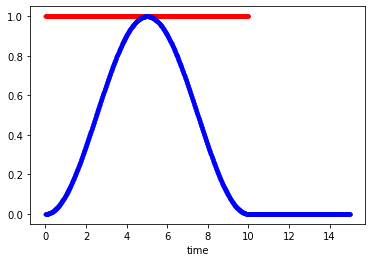

In [178]:
#parameters
dt=0.01
t=np.arange(0,15,dt)
T=10

#barcar function
def boxcar(T,t):
    
    b=[0]*len(t)
    
    for n in range(len(t)):
        if t[n]<=T:
            b[n]=1
            
    return b

#window function    
def Hann(T,t):
    
    h=[0]*len(t)
    
    for n in range(len(t)):
        if t[n]<=T:
            h[n]=1/2*(1-np.cos(2*np.pi*t[n]/T))
            
    return h

#define the boxcar and window function over given time domain
b=boxcar(T,t)
h=Hann(T,t)

#plot the boxcar and window function
plt.plot(t,b,"r.",t,h,"b.")
plt.xlabel("time")
plt.show()

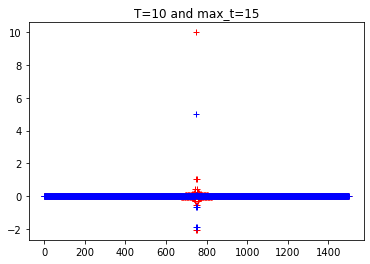

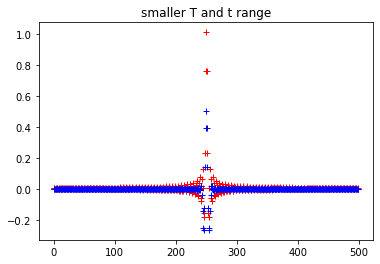

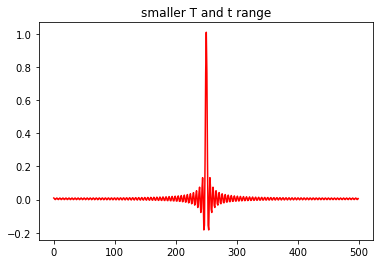

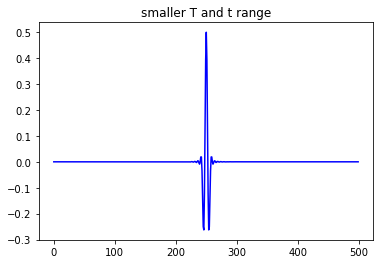

In [179]:
#DFT the boxcar function
bft=np.fft.fft(b)*dt
bft=np.fft.fftshift(bft)

#DFT the window function
hft=np.fft.fft(h)*dt
hft=np.fft.fftshift(hft)

#plot the DFT of boxcar and window function
plt.plot(np.real(bft),"r+",np.real(hft),"b+")
plt.title("T=10 and max_t=15")
plt.show()

#to see the shape of the fourier transform better, reduce the domain of T and t
dt=0.01
t=np.arange(0,5,dt)
T=1
b2=boxcar(T,t)
h2=Hann(T,t)

bft2=np.fft.fft(b2)*dt
bft2=np.fft.fftshift(bft2)

hft2=np.fft.fft(h2)*dt
hft2=np.fft.fftshift(hft2)

plt.plot(np.real(bft2),"r+",np.real(hft2),"b+")
plt.title("smaller T and t range")
plt.show()
plt.plot(np.real(bft2),"r")
plt.title("smaller T and t range")
plt.show()
plt.plot(np.real(hft2),"b")
plt.title("smaller T and t range")
plt.show()

4.

Based on the shape of the graph:

The fourier transform of the boxcar function have a higher central peak, a longer oscillation diminsh across frequency from the central peak, and the diminshing oscillation amplitudes are smaller compared to the fourier transform of the Hann's window function.

The fourier transform of Hann's windown function have a smaller central peak amplitude. However the oscillation around the central peak diminsh much faster across frequency, but these oscillation amplitude are greater than those in the boxcar function.

For this reason when we trucate a function f(t) by either of the two function, the fourier transform of f(t) convolves with the fourier transform of each of the function respectively:

For the boxcar function, since its FT has a small but long lasting diminshing oscillation. The convolved G($\omega$) will also have a persistant and small noise across frequency domain, as compared to the original FT of f(t).

For the Hann function, since the FT has a large and quick diminshing oscillation. The convolved G($\omega$) will have sharper but louder noise across frequency domain, as compared to F($\omega$), the original FT of f(t).


5.

Because of the characteristic mentioned above, I believe the boxcar function is better at trucating across larger time domain, while the Hann function is better at trucating across smaller time domain.

Since the boxcar function FT have a long and small amplitude diminshing oscillation, when trucating small time domain it will produce a long background noise. Since when we do the convolution we are essentially taking the dot product of two time series, if the time domain of the trucated time series is small, then there would be more sum of the noise of the boxcar's with data points FT than the central peak. Then it produce a large noise region beyond the trucated area. However this becomes a smaller problem when trucating over large time domain, because when the time series is large, more points in the time series gets summed with the central peak, and since the central peak has a much higher amplitude than the diminshing oscillation. The amplitude of the noise become negligible.

The Hann function on the other hand has problem when trucating over large time domain, because for the FT, the amplitude of the diminishing oscillation is very close to the amplitude of the central peak. Then when we take the convolution, it produces a much larger noise within the trucated area compared to the boxcar function. However, the Hann function should be much better at trucating smaller time domain, since the width of the FT of diminishing ocillation is very narrow. This mean compared to the boxcar function, the convolution of FT will be summing less data points with the noise. Then when trucating this across small time domain, it will generates shorter noise beyond the trucated area than the boxcar function.

# Radial Distribution Function (12 pts)

**Background**

Liquids have no fixed internal structure. Yet they do have some short range order in the sense
that they have preferred intermolecular spacings, which are determined by the locations of minima
in the intermolecular potentials. The microscopic structure of liquids is often characterized by a
quantity known as the Radial Distribution Function $g(r)$, which is essentially the probability (Relative
to the average probability, which means that $g(r)$ tends to 1 at large $r$, where the neighbour is too far
away to feel any interaction.) that a molecule has a neighbouring molecule at distance $r$. Typically $g(r)$
shows a value that approaches zero at small $r$ since molecules cannot occupy the same space; it also shows a
peak at the preferred distance of nearest neighbours, and secondary peaks at preferred distances of more distant
neighbours. If a suitable collimated beam of particles (e.g. X-rays or neutrons) is sent through a
sample of the liquid, some of the particles are scattered. The number of particles scattered through
a given angle is related to the Fourier Transform of $g(r)$ evaluated at the wavenumber $k$
corresponding to the transverse momentum transfer associated with that scattering angle. Kittel derives
this relationship in Chapter 17 of Introduction to Solid State Physics.

If this all sounds complicated, all you need to know here is that something called the Structure
Factor $S(k)$ is effectively measured by looking at the scattered intensity as a function of
scattering transverse wavenumber $k$ (proportional to scattering angle), and that the Radial Distribution
Function is related to it by

$$ g(r) = 1 + \frac{1}{2 \pi^2 \rho r} \int_0^\infty k \left( S(k) - 1 \right) \sin(kr) dk $$

where $\rho$ is liquid number density (number of atoms per unit volume, computable from the three
constants mentioned in the introduction), $k$ is wavenumber, and $r$ is radius.

 1. You may have noticed some resemblance between expression (6) and the Fourier transform.
    First show that the integration part $\int_0^\infty k (S(k) - 1) \sin(kr) dk$
    can be rewritten as

    $$p(r) = \int_{-\infty}^\infty \frac{1}{2i} k \left( S(k) - 1 \right) e^{ikr} dk.$$
    
    __Hint__: The structure factor S(k) is even, since there should be no reason why scattering intensity would be different for one direction (+k) compared to its opposite (−k). Using the fact that S(k) is even may be useful.  

 2. Now we can make some connections between the Radial Transfer Function and the Fourier
    Transform, if we substitute $r \rightarrow t$ and $k \rightarrow \omega$. What is the Fourier transform
    $P(k)$ of $p(r)$? Is $P(k)$ a real, imaginary or general complex function? Is it even or odd? How will these
    affect $p(r)$? Is that what you expect? Plot $P(k)$ as a function of $k$ ranging from $-15\mathrm{\mathring{A}}^{-1}$ to $15\mathrm{\mathring{A}}^{-1}$
    based on `argon.py` (i.e. import and use the variables defined there).
    
    __Hint__: In constructing $S(k)$ from `argon.py`, you should make an "even" array twice the length (minus 1) of YanData. 
    YanData represents the structure factor (i.e. $S(k)$) for argon sampled at the $dk$ defined in the `argon.py` file. 
	It's specifically $S(k)$ sampled from `k = 0` to `k = len(YanData) * dk`, so create an even function out to the same length in the negative direction (i.e. the "k-axis" it's sampled on would be `-len(YanData)*dk,  ... 0, ..., + len(YanData)*dk`).

 3. Write a Python function `[gn, rn] = RDFcalc(S, dk, rho)` to calculate Radial Distribution
    Function $g(r)$ from Structure Factor $S(k)$ data, sampled at $dk$, and density $\rho$, and output
    the RDF vector $g_n$ and its corresponding radial distance vector $r_n$.

    __Hint__: for Python `fft()` and `ifft()` functions, realize that the values of the Fourier Transform
    corresponding to negative frequencies are stored in the second half of the arrays given to
    (`ifft`) or obtained from it (`fft`). You also have to study the difference between the DFT and
    FT to multiply the right factors.
 4. With the data provided in `argon.py`, compute the corresponding Radial Distribution Function
    $g(r)$. Plot your results for $r$ from $0$ to $15\mathrm{\mathring{A}}$;. Over what range of radius can you trust your
    result?

    __Hint__: To check if your results make sense, recall that $g(r)$ is related to the probability that a
    molecule has a neighbouring molecule at distance $r$, therefore, should be close to $0$
    when $r \rightarrow 0$, i.e. two molecules can not occupy the same space, and you can
    set $g(r = 0) = 0$. Recall $\lim_{r\rightarrow\infty}g(r)=1$. Also note the unit $\rho$ used in $g(r)$ formula (6).

 5. From the $g(r)$ you computed, estimate the average molecular radius $R_a$ of liquid argon. Give
    your reasoning and state what accuracy you can justify for your estimation.
 6. Now we explore the effect of sampling range. Yan sampled in wavenumber $k$ out to
    $k_{max} = 15.24\mathrm{\mathring{A}}^{-1}$, and he could have saved himself work by not collecting as much data,
    i.e., reducing $k_{max}$. But how much could he have reduced the sampling length $k_{max}$, while still
    seeing distinct peaks in the Radial Distribution Function? Also explain theoretically what you observe.

    __Hint__: Plot on top of the $g(r)$ obtained in Part 4, the $g(r)$'s you compute for a series of
    $k_{max}$ values. You can try half $k_{max}$ each time to look for changes. For the theoretical explanations
    for part 6 and 7, realize the interchangability of $t \leftrightarrow \omega$ ($r \leftrightarrow k$).

 7. To explore the effect of data sampling, let's assume Yan decided to save his work by sampling
    less often (i.e. increasing $dk$). How large a $dk$ can he use to be able to still recover the first
    two peaks clearly? State your answers and a theoretical justification for what you expect to
    see if you increase $dk$ too much.

    __Hint__: Plot on top of the $g(r)$ obtained from `argon.py` data, the $g(r)$'s you obtain when
    you subsample the same dataset. Try doubling $dk$ each time to observe the effect of coarser
    sampling.

### Collaborator = None

1.

We can use euler's formula: $sinx = \frac{e^{ix}-e^{-ix}}{2i}$

Then realize when we take the limit to infinity: $\lim_{x \to \infty} e^{-ix}=0$

So when we take the integral to infinity, $sinx =\frac{e^{ix}}{2i}$

Since y=k is odd, and sinkr is also odd. Multiplying the two would give us an even function: $ksin(kr) =k*\frac{e^{ikr}}{2i}$

Since S(k) is even, the multiple of two even function is also even: $ksin(kr)*(s(k)-1) =k*\frac{e^{ikr}}{2i}*(s(k)-1)$

Since this entire function is even, integrate from negative infinity to infinity will give us the same result as integrating from zero to infinity:

$\int_{-\infty}^\infty \frac{1}{2i} k \left( S(k) - 1 \right) e^{ikr} dk = \int_0^\infty \frac{1}{2i} k \left( S(k) - 1 \right) e^{ikr} dk$

2.

For fourier transform we have: $g(t)=\frac{1}{2\pi}\int_{-\infty}^\infty G(\omega) e^{it\omega} d\omega$

Now if we switch $r \rightarrow t$ and $k \rightarrow \omega$ for p(r), we have: 
$p(t)=\int_{-\infty}^\infty \frac{1}{2i} \omega \left( S(\omega) - 1 \right) e^{it\omega} dk$

Based on the difference between the general fourier transform, we can deduce that:
$P(\omega)=\frac{\pi}{i} \omega \left( S(\omega) - 1 \right)$

Since P($\omega$) has factors of i, it is a complex function. Since y=$\omega$ is odd, and s($\omega$)-1 is even, P($\omega$) is also odd.
Since P($\omega$) is odd and complex, p(t) should be odd and real. This is what we should expect, since p(t) is a real measured value.

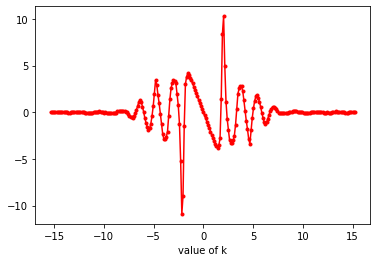

In [182]:
import sys

sys.path.append(r"C:\Users\bruce\OneDrive\Desktop\Year 4\PHY408\lab2")

#import py file
import argon

#define parameter from py file
n1=argon.YanData
n2=np.flip(n1) #generate a inverted data since Sk is even
sk=np.append(n2,n1) #add the two data array together
dk=argon.dk

#define the k domain
omega=np.fft.fftshift(np.fft.fftfreq(len(sk),1/(len(sk)*dk)))

#define the P(k) using s(k)
P=np.pi*omega*(sk-1)

#plot the P(k)
plt.plot(omega,P,"r.-")
plt.xlabel("value of k")
plt.show()

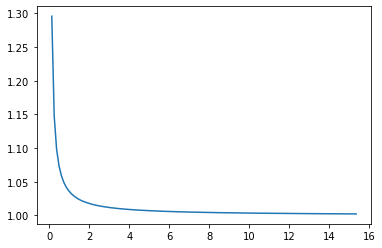

In [181]:
def RDFcalc(S, k, rho):
    
    #define parameter
    dk=0.12
    omega=np.fft.fftshift(np.fft.fftfreq(len(S),1/(len(S)*dk)))
    P=np.pi*omega*(S-1)
    
    #trying to get the missing radius parameter from the input
    max_r=15.36
    start_r=0
    r=np.arange(start_r+dk,max_r+dk,dk)
    
    #trying to get p(r) using DFT of P(k)
    p=np.fft.ifft(P)/(len(P)*dk)
    g=[0]*len(p)
    
    #trying to generate g(r) using r and p(r)
    for n in range(len(g)):
        g[n]=1+1/(2*(np.pi**2)*rho*r[n])
        
    return g, r
    
#testing the plot
g,r=RDFcalc(argon.YanData,15,argon.massRho)

plt.plot(r,g)

I don't understand how to output the radius r, when g(r) needs an input of r.